# Instalamos las librerias a usar

In [370]:
!pip install feature_engine

# Cargamos y vemos el Dataset

In [371]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [372]:
import os;
BASE = "/content/drive/MyDrive"
fichero = "IA/Datasets/googleplaystore.csv"


In [373]:
import pandas as pd

def load_play_store_data(BASE,fichero):
    csv_path = os.path.join(BASE, fichero)
    return pd.read_csv(csv_path)

In [374]:
play_store = load_play_store_data(BASE,fichero);
play_store.head() #Muestra la cabecera

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [375]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Borramos los datos irrelevantes

#### Borramos estas columnas ya que no sirven para clasificar

In [376]:
play_store = play_store.drop(columns=["App","Current Ver","Android Ver","Last Updated"], axis=1)

#### Eliminamos las filas que tengan Rating nulo. Usaremos el método dropna que elimina todas las filas que tengan valores nulos en la columna especificada

In [377]:
play_store = play_store.dropna(subset=['Rating'])
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9367 non-null   object 
 1   Rating          9367 non-null   float64
 2   Reviews         9367 non-null   object 
 3   Size            9367 non-null   object 
 4   Installs        9367 non-null   object 
 5   Type            9367 non-null   object 
 6   Price           9367 non-null   object 
 7   Content Rating  9366 non-null   object 
 8   Genres          9367 non-null   object 
dtypes: float64(1), object(8)
memory usage: 731.8+ KB


# Arreglamos la columna Rating para que se pueda clasificar

In [378]:
play_store.value_counts("Rating")

Rating
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
dtype: int64

#### Vemos que hay un valor de 19.0 lo vamos a reemplazar por un valor nulo y completamos con la media

In [379]:
import numpy as np

play_store['Rating'] = play_store['Rating'].replace(19.0, np.nan)

# Calcula la media de la columna 'Rating' excluyendo los valores nulos
mean_Rating = play_store['Rating'].dropna().mean()

#Le aplica la media a los nulos
play_store['Rating'] = play_store['Rating'].fillna(mean_Rating)

#### Por ultimo las vamos a agrupar en rangos para la clasificación. Tras probar combinaciones de como agruparlas vi que era la mejor

In [380]:
play_store.loc[(play_store['Rating'] >= 0)   & (play_store['Rating'] <= 3),"Rating"] = 3
play_store.loc[(play_store['Rating'] > 3) & (play_store['Rating'] <= 4.3)  ,"Rating"] = 4
play_store.loc[(play_store['Rating'] > 4.3)   & (play_store['Rating'] <= 5),"Rating"] = 5
play_store.value_counts("Rating")

Rating
4.0    4933
5.0    4064
3.0     370
dtype: int64

# 1º Vamos a empezar viendo las frecuencias de los valores de la columna Category para ver si se pueden agrupar

In [381]:
play_store['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
1.9                       1
Name: Category, dtype: int64

#### Vemos que las frecuencias en las categorías son muy dispares asique juntaremos en una categoria las que tengan sentido, como por ejemplo Business con Finance para intentar mejorarlo. **Era mínimamente mejor sin agruparlas asique descartado**

In [382]:
# play_store['Category'] = play_store['Category'].replace(["BUSINESS","FINANCE","PRODUCTIVITY"], "BUSINESS-FINANCE-PRODUCTIVITY")

# play_store['Category'] = play_store['Category'].replace(["TOOLS","LIBRARIES_AND_DEMO"], "TOOLS-LIBRARIES_AND_DEMO")

# play_store['Category'] = play_store['Category'].replace(["COMMUNICATION","SOCIAL","DATING"], "COMMUNICATION-SOCIAL-DATING")

# play_store['Category'] = play_store['Category'].replace(["PHOTOGRAPHY","ART_AND_DESIGN"],"PHOTOGRAPHY-ART_AND_DESIGN")

# play_store['Category'] = play_store['Category'].replace(["ENTERTAINMENT","GAME","VIDEO_PLAYERS"], "GAME-ENTERTAINMENT-VIDEO_PLAYERS")

# play_store['Category'] = play_store['Category'].replace(["EDUCATION","BOOKS_AND_REFERENCE","NEWS_AND_MAGAZINES","COMICS"], "EDUCATION-BOOKS-NEWS-MAGAZINES-COMICS")

# play_store['Category'] = play_store['Category'].replace(["SPORTS","MEDICAL","HEALTH_AND_FITNESS","BEAUTY","FOOD_AND_DRINK"], "SPORTS-MEDICAL-HEALTH_AND_FITNESS-BEAUTY-FOOD_AND_DRINK")

# play_store['Category'] = play_store['Category'].replace(["FAMILY","PARENTING"], "FAMILY-PARENTING")

# play_store['Category'] = play_store['Category'].replace(["PERSONALIZATION","LIFESTYLE"],"PERSONALIZATION-LIFESTYLE")

# play_store['Category'] = play_store['Category'].replace(["SHOPPING","TRAVEL_AND_LOCAL","MAPS_AND_NAVIGATION","AUTO_AND_VEHICLES","WEATHER","EVENTS","1.9","HOUSE_AND_HOME"], "OTHERS")


# play_store['Category'].value_counts()

#### Un vez agrupadas y tras ver que el modelo no era muy bueno prediciendo vamos a aplicarle un CountFrequencyEncoder a las categorías agrupadas

In [383]:
from feature_engine.encoding import CountFrequencyEncoder

# set up the encoder
encoder = CountFrequencyEncoder(encoding_method='frequency',
                         variables=["Category"])

# fit the encoder
encoder.fit(play_store)

# transform the data
play_store = encoder.transform(play_store)


play_store.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0.006619,4.0,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,0.006619,4.0,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,0.006619,5.0,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,0.006619,5.0,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,0.006619,4.0,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [384]:
play_store['Category'].value_counts()

0.186506    1747
0.117113    1097
0.078360     734
0.033522     628
0.037472     351
0.037365     350
0.035017     328
0.034483     323
0.034056     319
0.033842     317
0.032348     303
0.031707     297
0.027650     259
0.025408     238
0.024875     233
0.024127     226
0.020818     195
0.019003     178
0.017081     160
0.016547     155
0.015907     149
0.013238     124
0.011637     109
0.008114      76
0.008007      75
0.007793      73
0.006939      65
0.006619      62
0.006192      58
0.005338      50
0.004804      45
0.004484      42
0.000107       1
Name: Category, dtype: int64

# 2º Ahora vamos con la columna Reviews que la vamos a pasar a float

In [385]:
play_store['Reviews'] = play_store['Reviews'].replace("3.0M", "3000000") #Este es el unico valor que nos daría problemas a pasar los datos a float, asique lo reemplazamos

play_store['Reviews'] = play_store['Reviews'].astype(float) #Las pasamos de String a float

#### Vemos que tiene muy poca correlación asique vamos a agrupar los datos buscando conseguir una mayor corelación

### Agrupamos en 0, +500, +1000, +5000, +10000, +20_000. **A la hora de probar el modelo hemos visto que daba mejores resultados sin agruparlos asique descartamos esta opción**

In [386]:
# play_store.loc[(play_store['Reviews'] == 0),"Reviews"] = 0.000001 #Para que no de fallo al hacerle el log10
# play_store.loc[(play_store['Reviews'] >= 0) & (play_store['Reviews'] < 500),"Reviews"] = 0.000001 #Para que no de fallo al hacerle el log10
# play_store.loc[(play_store['Reviews'] >= 500) & (play_store['Reviews'] < 1_000),"Reviews"] = 500
# play_store.loc[(play_store['Reviews'] >= 1_000) & (play_store['Reviews'] < 5_000),"Reviews"] = 1_000
# play_store.loc[(play_store['Reviews'] >= 5_000) & (play_store['Reviews'] < 10_000),"Reviews"] = 5_000
# play_store.loc[(play_store['Reviews'] >= 10_000) & (play_store['Reviews'] < 20_000),"Reviews"] = 10_000
# play_store.loc[(play_store['Reviews'] >= 20_000) & (play_store['Reviews'] < 50_000),"Reviews"] = 20_000
# play_store.loc[(play_store['Reviews'] >= 50_000) & (play_store['Reviews'] < 100_000),"Reviews"] = 50_000
# play_store.loc[(play_store['Reviews'] >= 100_000) & (play_store['Reviews'] < 500_000),"Reviews"] = 100_000
# play_store.loc[(play_store['Reviews'] >= 500_000) & (play_store['Reviews'] < 1_000_000),"Reviews"] = 500_000
# play_store.loc[(play_store['Reviews'] >= 1_000_000) & (play_store['Reviews'] < 10_000_000),"Reviews"] = 1_000_000
# play_store.loc[(play_store['Reviews'] >= 10_000_000),"Reviews"] = 10_000_000

# play_store['Reviews'].value_counts()

# 3º Vamos a ver la frecuencia de los datos de Installs

In [387]:
play_store['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Free                 1
Name: Installs, dtype: int64

#### Vamos a quitarles el + las comas y el Free y los reemplazamos por un 0 y así lo podremos pasar a float.

In [388]:
play_store['Installs'] = play_store['Installs'].replace('Free', '0')
play_store['Installs'] = play_store['Installs'].str.replace('+', '',regex=True).str.replace(',', '',regex=True)
play_store['Installs'] = play_store['Installs'].astype(float)

In [389]:
play_store['Installs'].value_counts()

1.000000e+06    1577
1.000000e+07    1252
1.000000e+05    1150
1.000000e+04    1010
5.000000e+06     752
1.000000e+03     713
5.000000e+05     538
5.000000e+04     467
5.000000e+03     432
1.000000e+08     409
1.000000e+02     309
5.000000e+07     289
5.000000e+02     201
5.000000e+08      72
1.000000e+01      69
1.000000e+09      58
5.000000e+01      56
5.000000e+00       9
1.000000e+00       3
0.000000e+00       1
Name: Installs, dtype: int64

# 4º Vamos con la columna Type

In [390]:
play_store['Type'].value_counts()

Free    8719
Paid     647
0          1
Name: Type, dtype: int64

In [391]:
play_store['Type'] = play_store['Type'].replace("0", 'Free')
play_store['Type'].value_counts()

Free    8720
Paid     647
Name: Type, dtype: int64

# 5º Vamos con la columna Price

In [392]:
play_store['Price'].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$299.99       1
$379.99       1
$37.99        1
$18.99        1
$1.20         1
Name: Price, Length: 74, dtype: int64

#### Pasaremos todos los datos a float quitándoles antes el signo $. Ponemos los datos a 0 porque es el valor más común y con mucha diferencia siendo la frecuencia de 0 8627 y del segundo más frecuente 114, sino hariamos la media

In [393]:
play_store['Price'] = play_store['Price'].str.replace('$', '')
play_store['Price'] = play_store['Price'].str.replace('Everyone', '777')
play_store['Price'] = play_store['Price'].astype(float)

<ipython-input-393-19c1cf468892>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store['Price'] = play_store['Price'].str.replace('$', '')


In [394]:
play_store['Price'].value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
299.99       1
379.99       1
37.99        1
18.99        1
1.20         1
Name: Price, Length: 74, dtype: int64

#### Su correlación es mala asique vamos a intentar mejorarla agrupando. **Descartado ya que no mejoraba el algoritmo**

In [395]:
play_store.loc[(play_store['Price'] == 0),"Price"] = 0.0001 #Para dividirlo con otra columna
# play_store.loc[(play_store['Price'] > 0) & (play_store['Price'] <= 0.99),"Price"] = 1
# play_store.loc[(play_store['Price'] > 1) & (play_store['Price'] <= 1.99),"Price"] = 1.99
# play_store.loc[(play_store['Price'] > 1.99) & (play_store['Price'] <= 2.99),"Price"] = 2.99
# play_store.loc[(play_store['Price'] > 2.99) & (play_store['Price'] <= 3.99),"Price"] = 3.99
# play_store.loc[(play_store['Price'] > 3.99) & (play_store['Price'] <= 4.99),"Price"] = 4.99
# play_store.loc[(play_store['Price'] > 4.99) & (play_store['Price'] <= 5.99),"Price"] = 5.99
# play_store.loc[(play_store['Price'] > 5.99) & (play_store['Price'] <= 20),"Price"] = 20
# play_store.loc[(play_store['Price'] > 20) & (play_store['Price'] <= 50),"Price"] = 50
# play_store.loc[(play_store['Price'] > 50) & (play_store['Price'] <= 100),"Price"] = 100
# play_store.loc[(play_store['Price'] >= 299.99) & (play_store['Price'] <= 400.00),"Price"] = 400.00

In [396]:
play_store['Price'].value_counts()

0.0001      8719
2.9900       114
0.9900       107
4.9900        70
1.9900        59
            ... 
299.9900       1
379.9900       1
37.9900        1
18.9900        1
1.2000         1
Name: Price, Length: 74, dtype: int64

# 6º Vamos con la columna Content Rating

In [397]:
play_store['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#### El que no tiene rango le vamos a poner que sea para todos los públicos

In [398]:
play_store['Content Rating'] = play_store['Content Rating'].replace("Unrated", 'Everyone').replace(np.nan, 'Everyone')
play_store['Content Rating'].value_counts()

Everyone           7422
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Name: Content Rating, dtype: int64

# 7º Vamos con la columna Genres

In [399]:
play_store['Genres'].value_counts()

Tools                          733
Entertainment                  533
Education                      468
Action                         358
Productivity                   351
                              ... 
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Entertainment;Education          1
Strategy;Creativity              1
Name: Genres, Length: 116, dtype: int64

#### Nos vamos a quedar con el índice de la fila que contiene dos generos. Esto lo haremos para comprobar su funciona lo que vamos a hacer más adelante

In [400]:
indice_comprobar = play_store.loc[play_store['Genres'] == 'Health & Fitness;Education'].index[0]

#### Vemos que hay valores con solo un género y valores con varios géneros que están separadas por puntos asique primero creamos un conjunto con todos los géneros que hay

In [401]:
genres_set = set(play_store['Genres'].unique())
genres_set_2 = set() #Este será el q no contiene varios generos

# Hacemos un bucle que vaya genero por genero los que tienen ; los separará los enviará a una lista y recorrera la lista metiendolos en el conjunto
# los que no tengan ; no los separa y los mete en el conjunto directamente

for genre in genres_set:
  if type(genre)==int: pass
  else:
    if ';' in genre: #Si tiene ; los separa y mete en la lista
      genre_lista = genre.split(';')
      for genre2 in genre_lista:
        genres_set_2.add(genre2)
    else:
      genres_set_2.add(genre)

print(genres_set_2)
genres_set_2.remove("February 11, 2018")
print(genres_set_2)

{'Books & Reference', 'Casino', 'Shopping', 'Strategy', 'Health & Fitness', 'Business', 'Art & Design', 'Parenting', 'Comics', 'Dating', 'Medical', 'Music & Audio', 'Productivity', 'Arcade', 'Casual', 'Video Players & Editors', 'Social', 'Role Playing', 'Trivia', 'Music & Video', 'Photography', 'Racing', 'House & Home', 'Simulation', 'Action & Adventure', 'Adventure', 'Lifestyle', 'Brain Games', 'Tools', 'Word', 'February 11, 2018', 'Board', 'Creativity', 'Entertainment', 'Sports', 'Communication', 'Personalization', 'Puzzle', 'Beauty', 'News & Magazines', 'Card', 'Food & Drink', 'Maps & Navigation', 'Finance', 'Travel & Local', 'Education', 'Music', 'Educational', 'Libraries & Demo', 'Auto & Vehicles', 'Pretend Play', 'Weather', 'Action', 'Events'}
{'Books & Reference', 'Casino', 'Shopping', 'Strategy', 'Health & Fitness', 'Business', 'Art & Design', 'Parenting', 'Comics', 'Dating', 'Medical', 'Music & Audio', 'Productivity', 'Arcade', 'Casual', 'Video Players & Editors', 'Social', 'R

#### Creamos un Dataframe con valores que son todo 0 y con las columnas que son los distintos géneros que hay por separado y se le irá añadiendo un 1 si esa fila contiene ese género. Es un OneHotEncoder pero distinto ya que tendrá en cuenta los valores que contienen dos géneros que están separados por ;

In [402]:
# Obtener las columnas OneHotEncoding utilizando la función "get_dummies()"

genres = play_store['Genres'].str.get_dummies(sep=';')
genres_encoded = genres.apply(lambda x: x.astype(int)).sum(level=0)

# Filtrar las columnas OneHotEncoding correspondientes a los géneros individuales de interés
genres_encoded = genres[genres_set_2]

# Concatenar las columnas OneHotEncoding al DataFrame original
play_store_encoded = pd.concat([play_store, genres_encoded], axis=1)

# Eliminar la columna original "Genres"
play_store_encoded = play_store_encoded.drop('Genres', axis=1)

<ipython-input-402-90b852831963>:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres_encoded = genres.apply(lambda x: x.astype(int)).sum(level=0)
<ipython-input-402-90b852831963>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genres_encoded = genres[genres_set_2]


In [403]:
play_store_encoded.loc[indice_comprobar, ["Education", "Health & Fitness"]]

Education           1
Health & Fitness    1
Name: 2145, dtype: object

#### Como vemos a funcionado le ha puesto un 1 a Education y a Health & Fitness

In [404]:
play_store = play_store_encoded
play_store

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Books & Reference,Casino,...,Travel & Local,Education,Music,Educational,Libraries & Demo,Auto & Vehicles,Pretend Play,Weather,Action,Events
0,0.006619,4.0,159.0,19M,10000.0,Free,0.0001,Everyone,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.006619,4.0,967.0,14M,500000.0,Free,0.0001,Everyone,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.006619,5.0,87510.0,8.7M,5000000.0,Free,0.0001,Everyone,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.006619,5.0,215644.0,25M,50000000.0,Free,0.0001,Teen,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.006619,4.0,967.0,2.8M,100000.0,Free,0.0001,Everyone,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0.186506,4.0,7.0,2.6M,500.0,Free,0.0001,Everyone,0,0,...,0,1,0,0,0,0,0,0,0,0
10836,0.186506,5.0,38.0,53M,5000.0,Free,0.0001,Everyone,0,0,...,0,1,0,0,0,0,0,0,0,0
10837,0.186506,5.0,4.0,3.6M,100.0,Free,0.0001,Everyone,0,0,...,0,1,0,0,0,0,0,0,0,0
10839,0.019003,5.0,114.0,Varies with device,1000.0,Free,0.0001,Mature 17+,1,0,...,0,0,0,0,0,0,0,0,0,0


#### **Esta opción fue descartada ya que no mejoraba el modelo**
#### Como son muchas columnas vamos a crear otra vez la columna genres pero con las frecuencias de los géneros, los que contenian varios se les sumarán las frecuencias de estos. Para ello reemplazaramos los 1 de las columnas por la suma de 1 que hay en toda la columna de cada genero y luego sumaremos todas las columnas de géneros en la columna Genres

In [405]:
# genres_set_2 #Variable con los nombres de las columnas

# for genre in genres_set_2:
#   frecuencia = play_store[genre].sum() #Obtenemos la frecuencia sumando los 1
#   play_store[genre] = play_store[genre].replace(1, frecuencia) #Reemplazamos los 1 por la frecuencia

In [406]:
# play_store['Genres_Frequency'] = play_store[genres_set_2].sum(axis=1) #Sumamos todos los generos con sus frecuencias en una única columna
# play_store = play_store.drop(columns=genres_set_2, axis=1) #Borramos las columnas
# play_store.info()

In [407]:
# play_store['Genres_Frequency'].value_counts()

#### De primeras podemos pensar que está mal hecho ya que si estamos viendo su valor que eran las frecuencias y su frecuencia deberián de ser iguales, pero no es así ya que había valores que tenían varios generos y hemos sumado las frecuencias de estos dos géneros

# 8º Vamos con la columna Size

In [408]:
play_store['Size'].value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 415, dtype: int64

#### Como los datos están en megabyte y kilobyte los vamos a pasar a la misma medida kilobyte quitandole la M y la K

In [409]:
play_store['Size'] = play_store['Size'].replace("M", "000",regex=True)
play_store['Size'] = play_store['Size'].replace("k", "",regex=True)
play_store['Size'] = play_store['Size'].replace("\+", "",regex=True)
play_store['Size'] = play_store['Size'].replace(",", "",regex=True)
play_store['Size'] = play_store['Size'].replace("Varies with device", np.nan,regex=True)


play_store['Size'] = play_store['Size'].astype(float)

#### Completamos los nulos creados antes con la media

In [410]:
# calcula la media de la columna
mean = play_store['Size'].mean()

# completa los valores nulos con la media
play_store['Size'] = play_store['Size'].fillna(mean)

# 9º Hacemos el onehotencoder a las columnas Type y Content Rating

In [411]:
# aplicamos la función get_dummies() a las columnas seleccionadas
encoded_df = pd.get_dummies(play_store[['Type','Content Rating']])

# combinamos el DataFrame original con el DataFrame codificado
play_store_encoded = pd.concat([play_store, encoded_df], axis=1)

# eliminamos las columnas originales que ya fueron codificadas
play_store = play_store_encoded.drop(['Type','Content Rating'], axis=1)
play_store

,Category,Rating,Reviews,Size,Installs,Price,Books & Reference,Casino,Shopping,Strategy,...,Weather,Action,Events,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,0.006619,4.0,159.0,19000.000000,10000.0,0.0001,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0.006619,4.0,967.0,14000.000000,500000.0,0.0001,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0.006619,5.0,87510.0,8.700000,5000000.0,0.0001,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.006619,5.0,215644.0,25000.000000,50000000.0,0.0001,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.006619,4.0,967.0,2.800000,100000.0,0.0001,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0.186506,4.0,7.0,2.600000,500.0,0.0001,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10836,0.186506,5.0,38.0,53000.000000,5000.0,0.0001,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10837,0.186506,5.0,4.0,3.600000,100.0,0.0001,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10839,0.019003,5.0,114.0,21088.652393,1000.0,0.0001,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Vemos como queda el Dataframe

In [412]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        9367 non-null   float64
 1   Rating                          9367 non-null   float64
 2   Reviews                         9367 non-null   float64
 3   Size                            9367 non-null   float64
 4   Installs                        9367 non-null   float64
 5   Price                           9367 non-null   float64
 6   Books & Reference               9367 non-null   int64  
 7   Casino                          9367 non-null   int64  
 8   Shopping                        9367 non-null   int64  
 9   Strategy                        9367 non-null   int64  
 10  Health & Fitness                9367 non-null   int64  
 11  Business                        9367 non-null   int64  
 12  Art & Design                    9

# 10 º Intentamos buscar nuevas columnas combinando las que tenemos

In [413]:
play_store["Reviews*Installs"] = play_store["Installs"] * play_store["Reviews"]
play_store["Installs*Type_Paid"] = play_store["Installs"] * ( play_store["Type_Paid"] + 1)

# Visualización del dataset

In [414]:
play_store.head()

,Category,Rating,Reviews,Size,Installs,Price,Books & Reference,Casino,Shopping,Strategy,...,Events,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Reviews*Installs,Installs*Type_Paid
0,0.006619,4.0,159.0,19000.0,10000.0,0.0001,0,0,0,0,...,0,1,0,0,1,0,0,0,1.590000e+06,10000.0
1,0.006619,4.0,967.0,14000.0,500000.0,0.0001,0,0,0,0,...,0,1,0,0,1,0,0,0,4.835000e+08,500000.0
2,0.006619,5.0,87510.0,8.7,5000000.0,0.0001,0,0,0,0,...,0,1,0,0,1,0,0,0,4.375500e+11,5000000.0
3,0.006619,5.0,215644.0,25000.0,50000000.0,0.0001,0,0,0,0,...,0,1,0,0,0,0,0,1,1.078220e+13,50000000.0
4,0.006619,4.0,967.0,2.8,100000.0,0.0001,0,0,0,0,...,0,1,0,0,1,0,0,0,9.670000e+07,100000.0


# Pasamos la columna Rating a 0, 1 y 2

In [415]:
rating_mapping = {4.0: 1, 5.0: 2, 3.0: 0}

# Aplicar el mapeo a la columna 'Rating'
play_store['Rating'] = play_store['Rating'].map(rating_mapping)

play_store['Rating'].value_counts()


1    4933
2    4064
0     370
Name: Rating, dtype: int64

# Dividimos en Train y Test

In [416]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(play_store, test_size=0.30) #cogemos el 20 por ciento para testear


y_train = X_train["Rating"].copy()
X_train = X_train.drop("Rating", axis=1)

# Entrenando y evaluando

#### Importamos las medidas de evaluación y el crosss val predict

In [417]:
from sklearn.metrics import precision_score, recall_score;
from sklearn.metrics import roc_auc_score;
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import f1_score;

#### Implementamos los algoritmos más usados en clasificación y visualizamos sus medidas de rendimiento

* Cross Val Predict lo usaremos para generar predicciones utilizando validación cruzada, que nos proporciona una evaluación más precisa del rendimiento del modelo y reduce el riesgo de sobreajuste

* La precisión mide la capacidad del modelo para no etiquetar como positivo una muestra que es negativa. Precisión = VP / (VP + FP)

* La sensibilidad mide la proporción de verdaderos positivos sobre el total de muestras positivas. sensibilidad = VP / (VP +FN)

* F1 score

In [418]:
from sklearn.svm import SVC

svc_clf = SVC(gamma="auto")
svc_clf.fit(X_train, y_train)

#Medidas
y_train_pred_svc = cross_val_predict(svc_clf, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred_svc, average=None)
recall = recall_score(y_train, y_train_pred_svc, average=None)
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));

Precisión: 	 [0.47 0.55 0.7 ] 0.5745772220828617
Recall: 	 [0.04 0.96 0.12] 0.3730930828441397


#### No nos ha dado buenos resultados ya que unas predicciones del 50% es como tirar una moneda al aire

In [419]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

#Medidas
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred_sgd, average=None)
recall = recall_score(y_train, y_train_pred_sgd, average=None)
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Precisión: 	 [0.04 0.53 0.44] 0.33342663697491504
Recall: 	 [0.2 0.6 0.2] 0.3341043352596626


#### Lo mismo que el anterior

In [420]:
from sklearn.ensemble import RandomForestClassifier;

# crea varios arboles de descion y escoge lo más frecuente o lo que mas se repite
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators es la cantidad de arboles que vamos a crear
forest_clf.fit(X_train, y_train)

#Medidas
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred_forest, average=None)
recall = recall_score(y_train, y_train_pred_forest, average=None)
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));

Precisión: 	 [0.19 0.69 0.68] 0.5159837004819652
Recall: 	 [0.07 0.76 0.63] 0.48455404118053913


#### Tiene buena pinta ya que las dos ultimas clases predicen entre un 70% y con buena sensibilidad lo usaremos en el testeo

In [425]:
from xgboost import XGBClassifier


xgb_clf = XGBClassifier(n_estimators=200, random_state=42,learning_rate=0.01)
xgb_clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de entrenamiento utilizando validación cruzada
y_train_pred_xgb = cross_val_predict(xgb_clf, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred_xgb, average=None)
recall = recall_score(y_train, y_train_pred_xgb, average=None)
print("Precisión:\t", np.round(precision, 2), np.mean(precision))
print("Recall:\t\t", np.round(recall, 2), np.mean(recall))

Precisión:	 [0.19 0.64 0.7 ] 0.5077981384224941
Recall:		 [0.02 0.84 0.49] 0.44704770030600566


#### Los resultados son parecidos al anterior

# Matriz de confusión
#### La usaremos para mostar la frecuencia con la que el modelo clasifica las instancias de cada clase en función de la verdadera clase de esas instancias.

In [427]:
from sklearn.metrics import confusion_matrix;
import matplotlib.pyplot as plt;
import seaborn as sns;

class_names = ["3","4","5"]

### Matriz de confusión del forest

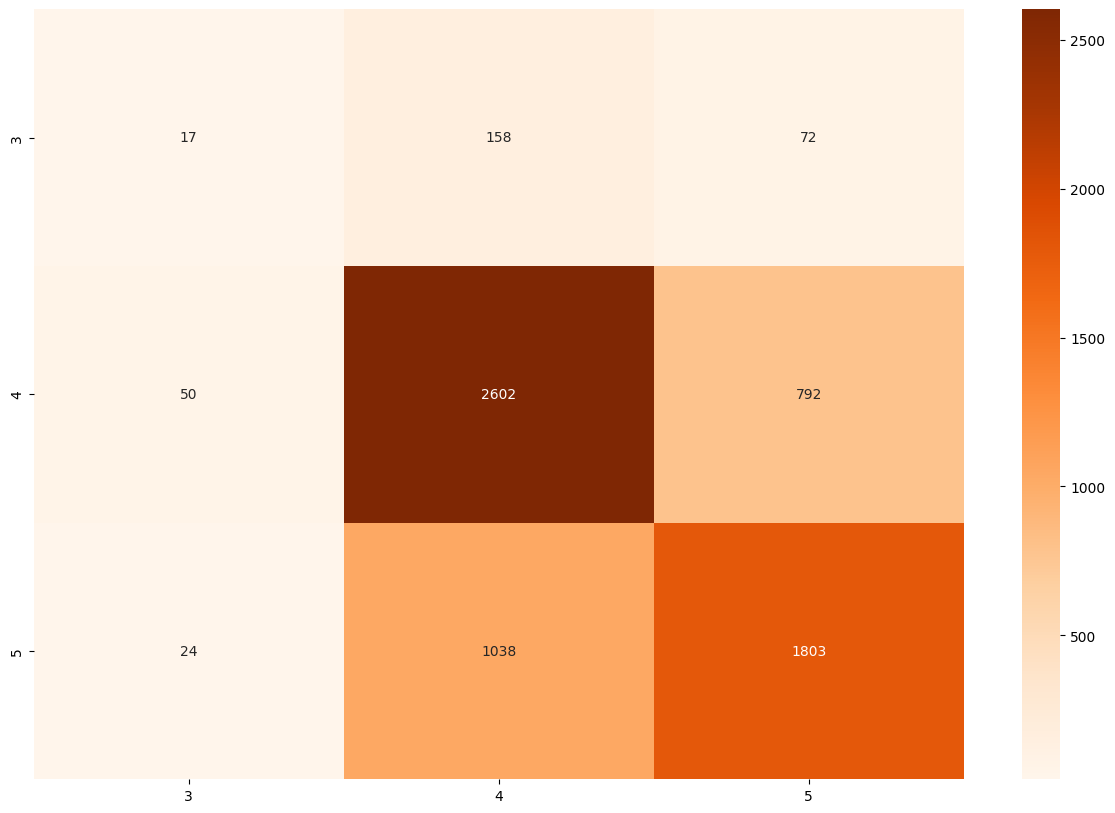

In [428]:
cm = confusion_matrix(y_train, y_train_pred_forest)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

### Matriz de confusión del SVC

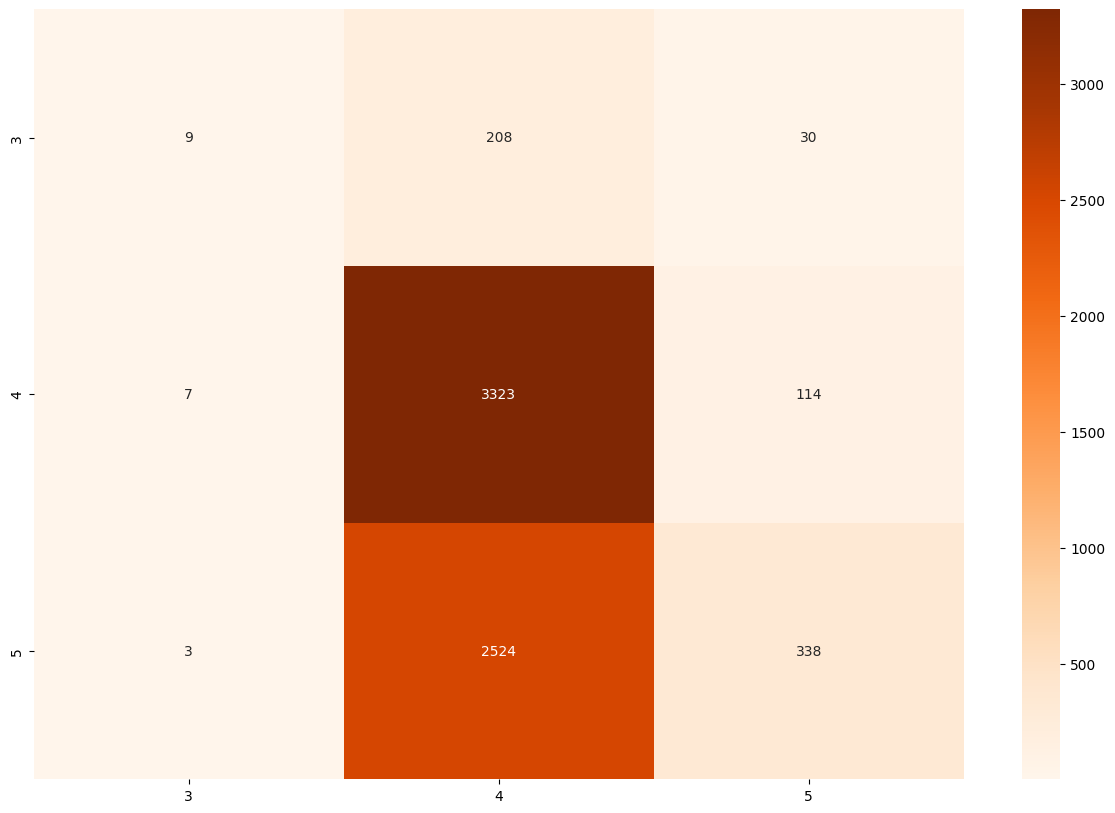

In [429]:
cm = confusion_matrix(y_train, y_train_pred_svc)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

### Matriz de confusión del XGBoost


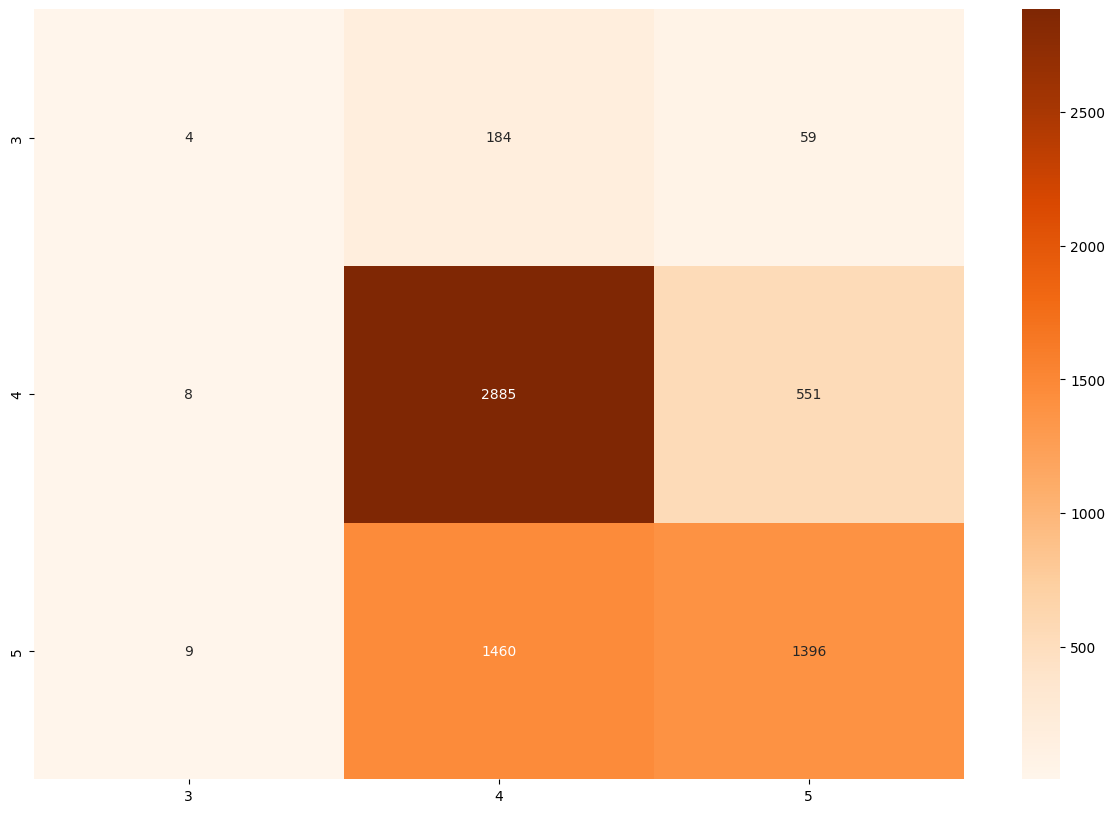

In [438]:
cm = confusion_matrix(y_train, y_train_pred_xgb)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

### Vemos que el svc lo unico que hace es predecir que son de la clase 4,5 pero tiene muy mala sensibilidad ya que aunque clasifica muchos como 4,5 y los acierta, tambien da muchos falsos positivos

# Evaluando el modelo con el Test Set

In [431]:
y_test = X_test["Rating"].copy()
X_test = X_test.drop("Rating", axis=1)

### Resultados del RandomForestClassifier

In [432]:
y_test_pred_forest = forest_clf.predict(X_test)

precision = precision_score(y_test, y_test_pred_forest, average=None)
recall = recall_score(y_test, y_test_pred_forest, average=None)
f1 = f1_score(y_test, y_test_pred_forest, average=None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

Precisión: 	 [0.26 0.69 0.68] 0.5430464902501515
Recall: 	 [0.1  0.75 0.64] 0.49854277171257166
F1: 		 [0.14 0.72 0.66] 0.5077939413399134


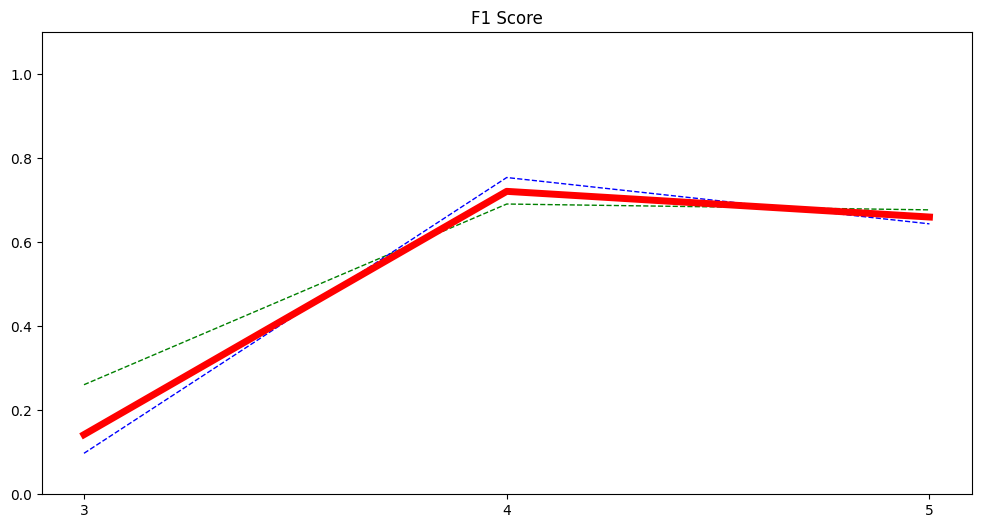

In [433]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

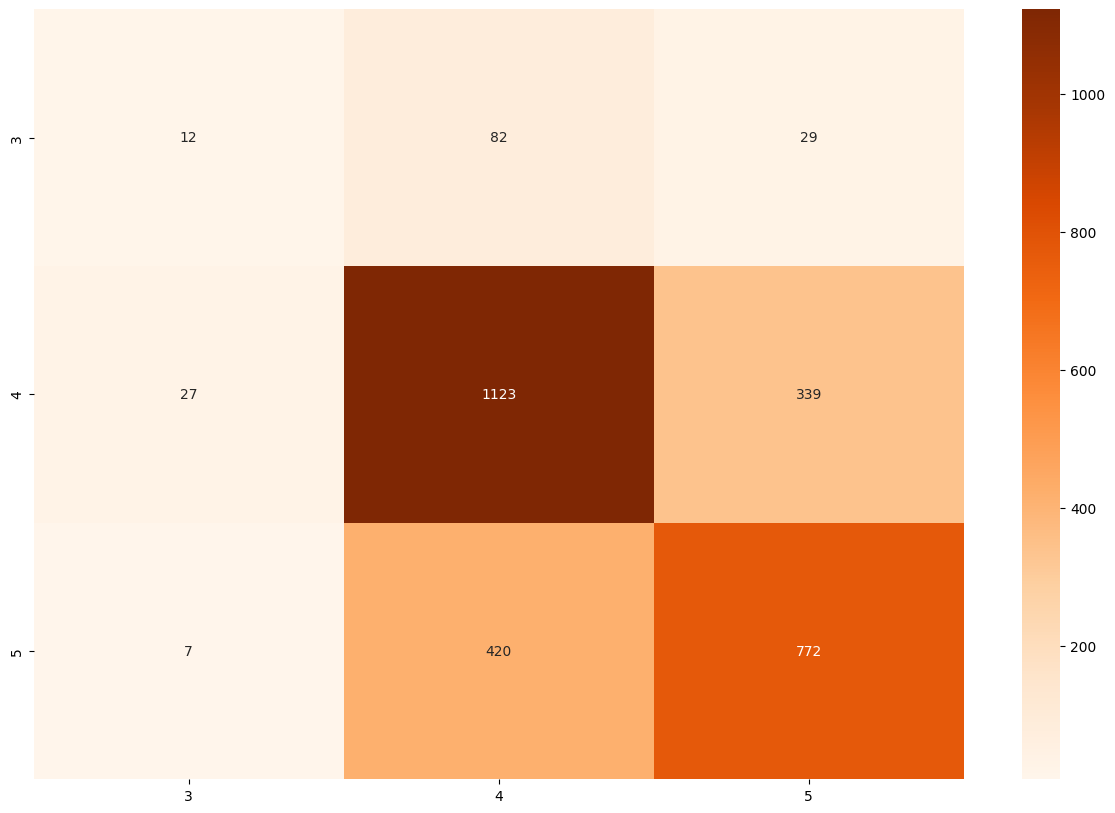

In [434]:
cm = confusion_matrix(y_test, y_test_pred_forest)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

#### Podemos ver que predice muy bien las dos últimas clases y tb con una buena sensibilidad, para la primera clase no serviría este modelo pero para saber si una aplicación esta entre un 3-4 y un 4-5 si serviría

### Resultados del SVC

In [435]:
y_test_pred = svc_clf.predict(X_test)

precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

Precisión: 	 [0.4  0.56 0.74] 0.5646330481058573
Recall: 	 [0.05 0.97 0.13] 0.38149904815153857
F1: 		 [0.09 0.71 0.22] 0.3366331246979158


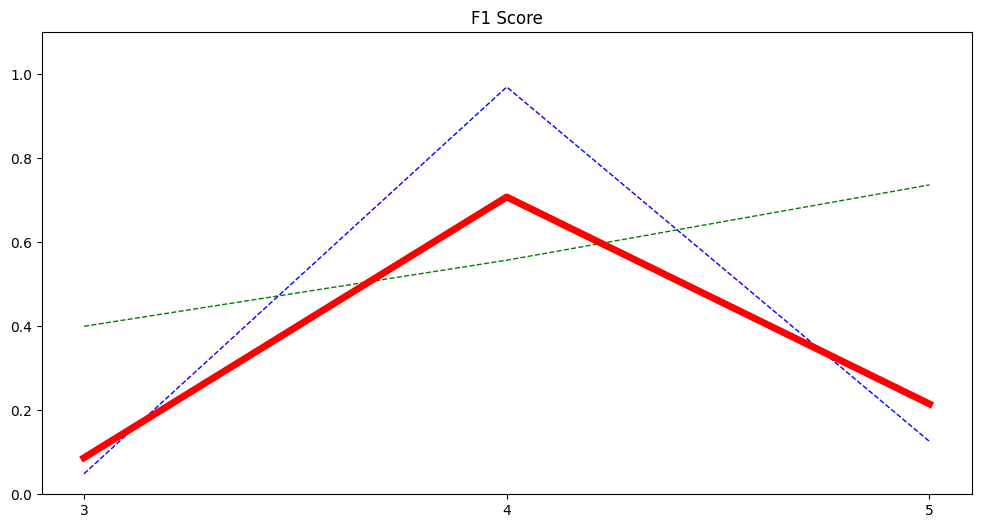

In [436]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

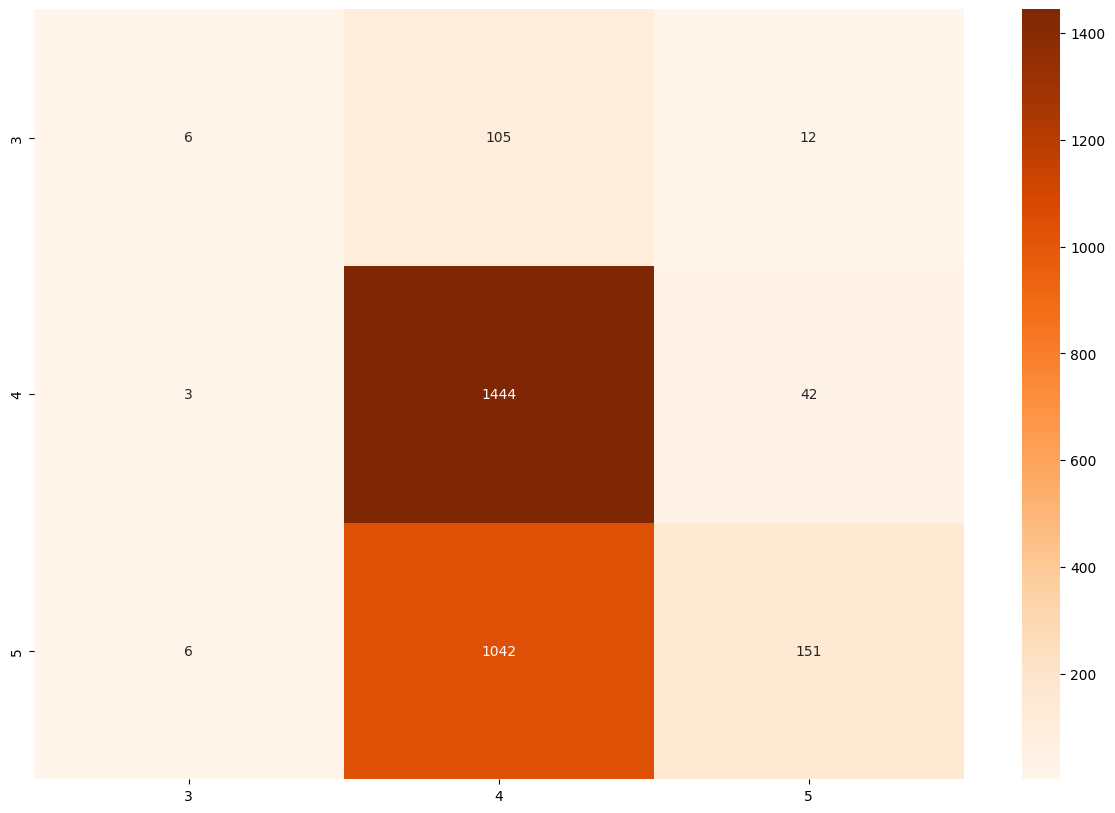

In [437]:
cm = confusion_matrix(y_test, y_test_pred)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

#### No sirve el modelo ya que solo predice que es de la clase 4

### Resultados del XGBOOST

In [439]:
y_test_pred = xgb_clf.predict(X_test)

precision = precision_score(y_test, y_test_pred, average=None)
recall = recall_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

Precisión: 	 [0.25 0.63 0.68] 0.5204113959283484
Recall: 	 [0.02 0.83 0.48] 0.4414766665592104
F1: 		 [0.03 0.72 0.56] 0.4360629989053863


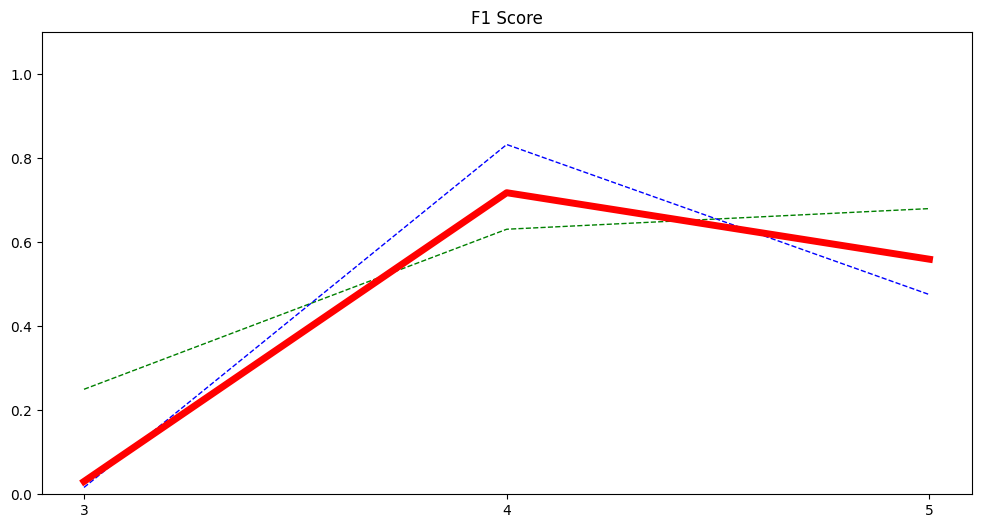

In [440]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

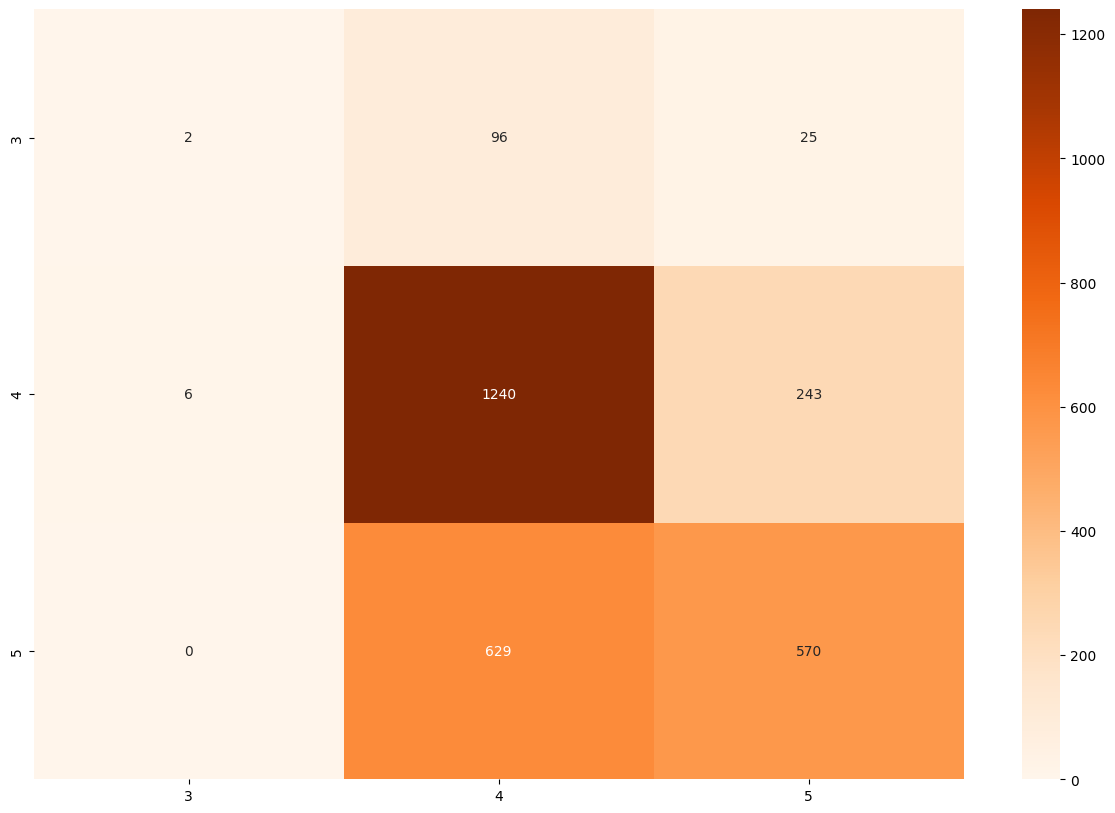

In [441]:
cm = confusion_matrix(y_test, y_test_pred)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

## En conclusión tanto el Randomforest como el Xgboost son los mejores modelos, aunque ninguno de ellos predice la clase 3 y la clase 4 y 5 la predicen pero con varios fallos.